In [2]:
import pysodb 
import scanpy as sc
import anndata as ad 

import pysodb

sodb = pysodb.SODB()

experiment_list = sodb.list_experiment_by_dataset('schurch2020coordinated')


adata_list = []

for e in experiment_list:
    adata = sodb.load_experiment('schurch2020coordinated',e)
    adata_list.append(adata)

load experiment[reg020_B] in dataset[schurch2020coordinated]
load experiment[reg021_B] in dataset[schurch2020coordinated]
load experiment[reg016_A] in dataset[schurch2020coordinated]
load experiment[reg041_B] in dataset[schurch2020coordinated]
load experiment[reg017_A] in dataset[schurch2020coordinated]
load experiment[reg014_B] in dataset[schurch2020coordinated]
load experiment[reg044_B] in dataset[schurch2020coordinated]
load experiment[reg013_B] in dataset[schurch2020coordinated]
load experiment[reg052_B] in dataset[schurch2020coordinated]
load experiment[reg069_B] in dataset[schurch2020coordinated]
load experiment[reg042_B] in dataset[schurch2020coordinated]
load experiment[reg019_A] in dataset[schurch2020coordinated]
load experiment[reg058_A] in dataset[schurch2020coordinated]
load experiment[reg009_A] in dataset[schurch2020coordinated]
load experiment[reg046_A] in dataset[schurch2020coordinated]
load experiment[reg026_A] in dataset[schurch2020coordinated]
load experiment[reg057_A

In [3]:
adata = ad.concat(adata_list, label='slice_id')

adata.obs['condition'] = (adata.obs['groups'] == '1').values

adata.obs['condition'] = adata.obs['condition'].astype(int)

In [4]:
import time
from Taichi.model import Taichi


import scanpy as sc 
import time
import numpy as np
import anndata as ad

start_time = time.time()

model = Taichi(adata, ct_obs='ClusterName', slice_id='slice_id')

model.mender_init(scale=4, radius=50, nn_mode='radius')

model.run_mender(n_process=200)

model.label_refinement()

res = model.graph_diffusion()

end_time = time.time()

print(f'Total Running Time {end_time - start_time}')

default number of process is 200
total batch: 140, running batch 0
scale 0, median #cells per radius (r=50): 11.0
scale 1, median #cells per radius (r=50): 30.0
total batch: 140, running batch 1
scale 0, median #cells per radius (r=50): 3.0
scale 1, median #cells per radius (r=50): 5.0
scale 2, median #cells per radius (r=50): 7.0
scale 3, median #cells per radius (r=50): 7.0
scale 2, median #cells per radius (r=50): 49.0
total batch: 140, running batch 2
scale 3, median #cells per radius (r=50): 66.0
scale 0, median #cells per radius (r=50): 9.0
scale 1, median #cells per radius (r=50): 23.0
scale 2, median #cells per radius (r=50): 35.0
total batch: 140, running batch 3
scale 3, median #cells per radius (r=50): 45.0
scale 0, median #cells per radius (r=50): 11.0
scale 1, median #cells per radius (r=50): 27.0
total batch: 140, running batch 4
scale 2, median #cells per radius (r=50): 43.0
scale 0, median #cells per radius (r=50): 10.0
scale 3, median #cells per radius (r=50): 57.0
sca

In [5]:
from sklearn.metrics import  recall_score

recall_list = []
recall = {}
y_pred = {}
y_pred['Taichi'] = []
label = []
slice_id = []

recall['Taichi'] = []


adata_list = []

for s in adata.obs['slice_id'].unique():
    temp = adata[adata.obs['slice_id'] == s]
    adata_list.append(temp)

adata_ = ad.concat(adata_list, label='slice_id')

for i, a in enumerate(adata_list):
    y_label = (a.obs['neighborhood name'] == 'Follicle').values
    if a.obs['groups'][0] == '1':
        if y_label.sum() > 50 :
            taichi = a.obs['new_labels'].values.astype(int)
            y_pred['Taichi'].append(taichi)
            label.append(y_label)
            recall_list.append(recall_score(y_label, taichi))
            recall['Taichi'].append(recall_score(y_label, taichi))
            slice_id.append(str(i))

rank = np.argsort(recall_list)

{'': '#CA9C91', 'Bulk tumor': '#8D5FA3', 'Follicle': '#7E594D', 'Granulocyte enriched': '#CE8DAC', 'Immune-infiltrated stroma': '#C24A7A', 'Macrophage enriched': '#D2AD50', 'Smooth muscle': '#83B756', 'T cell enriched': '#95D1D7', 'Tumor boundary': '#748EBB', 'Vascularized smooth muscle': '#CC625F'}


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Follicle
Immune-infiltrated stroma
Macrophage enriched
Smooth muscle
T cell enriched
Tumor boundary
Vascularized smooth muscle


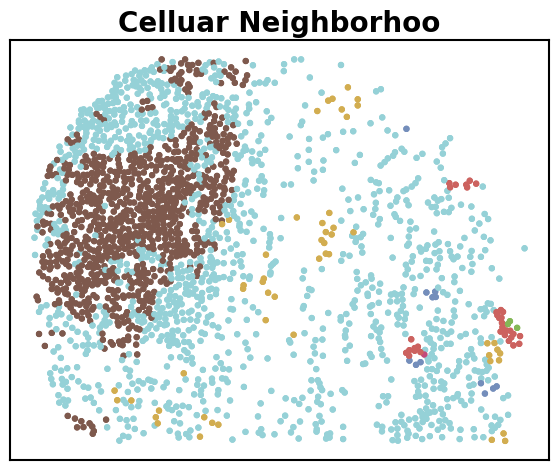

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

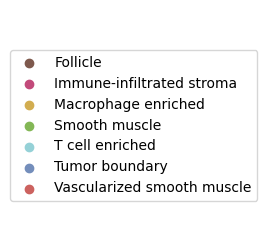

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


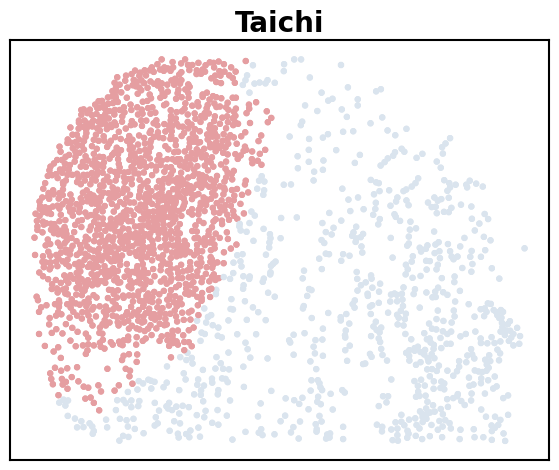

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_items([])


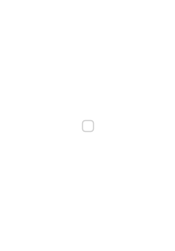

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Follicle
Immune-infiltrated stroma
Macrophage enriched
Smooth muscle
T cell enriched
Vascularized smooth muscle


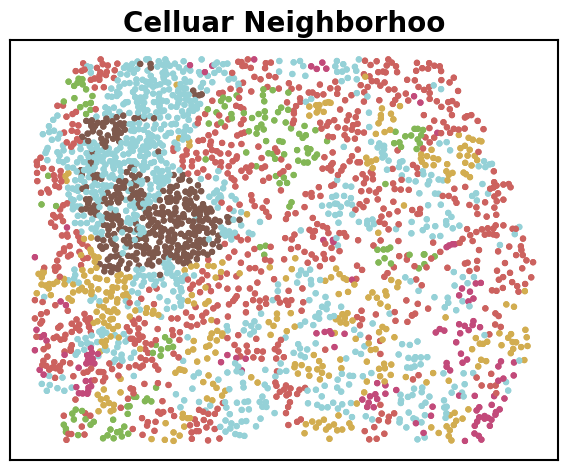

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

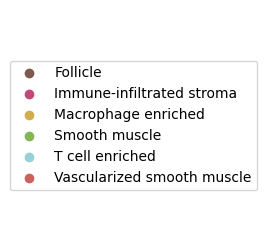

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


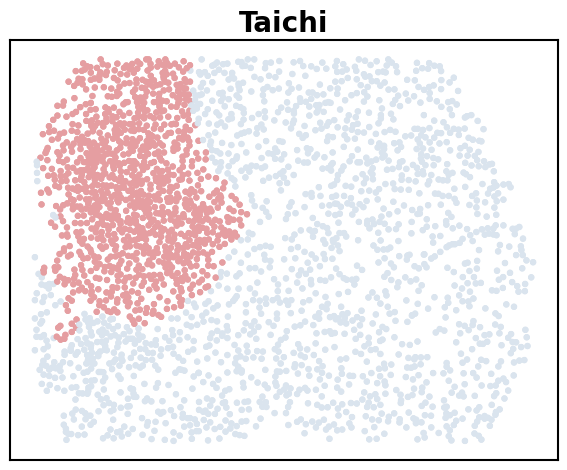

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_items([])


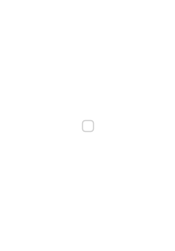

In [9]:
import squidpy as sq 
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#TNBC=16 4 5 (4 15)
#CRC= 1 4 5  (4 50)
#Diabetes=3 4 5 (4 50)


res_palette = ['#DAE4EE', '#E59EA1']


palette = ['#CA9C91', '#8D5FA3', '#7E594D', '#CE8DAC', '#C24A7A', '#D2AD50', '#83B756',
           '#95D1D7', '#748EBB', '#CC625F', '#FFD377', '#FD9BA0', '#BE9E33', '#C0E56F']

ct_obs = 'neighborhood name'

d = {c: palette[i] for i, c  in enumerate(res.obs[ct_obs].cat.categories)}

print(d)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15

cluster_key = 'neighborhood name'

ct_obs= 'neighborhood name'#'ClusterName'
batch_obs='slice_id'

train_adata = res

train_adata.obs['tls'] = (train_adata.obs['neighborhood name'] == 'Follicle').astype('category')

train_adata.obs['Taichi'] = train_adata.obs['new_labels'].astype('category')


categories = train_adata.obs[ct_obs].cat.categories

import matplotlib.pyplot as plt
import numpy as np

_, control_index = train_adata[train_adata.obs['condition'] == 0].obs[batch_obs].factorize()
_, condition_index = train_adata[train_adata.obs['condition'] == 1].obs[batch_obs].factorize()


adata_1 = train_adata[train_adata.obs[batch_obs].isin([control_index[0]])].copy()
adata_2 = train_adata[train_adata.obs[batch_obs].isin([condition_index[1]])].copy()
adata_3 = train_adata[train_adata.obs[batch_obs].isin([condition_index[3]])].copy()
adata_4 = train_adata[train_adata.obs[batch_obs].isin([condition_index[5]])].copy()

for e, j in enumerate([rank[-2], rank[-3]]):

    pat = [d[c] for c in train_adata[train_adata.obs['slice_id'] == slice_id[j]].obs[ct_obs].cat.categories.values]
    

    g = sq.pl.spatial_scatter(train_adata, shape=None, color=[ct_obs], library_id=[slice_id[j]],
                        library_key=batch_obs, return_ax=True, ncols=1, size=50, wspace=0.1, hspace=0.1, palette=ListedColormap(pat))

    all_handles_labels = []

    g = [g]
    
    for i, ax in enumerate(g):
        ax.get_legend().remove()
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in [l for _, l in all_handles_labels]:
                if label in categories:
                    print(label)
                    all_handles_labels.append((handle, label))
        '''for spine in ax.spines.values():
            spine.set_visible(False)'''
        ax.legend().remove()
        ax.set_title('Celluar Neighborhoo') 
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    plt.tight_layout()
    plt.show()

    unique_handles_labels =  dict(all_handles_labels).items()

    # Create a new figure for the comprehensive legend
    fig_legend, ax_legend = plt.subplots(figsize=(2, 3))  # Adjust size as needed
    fig_legend.legend(*zip(*unique_handles_labels), loc='center')
    ax_legend.axis('off')
    plt.show()

    from palettable.cartocolors.sequential import agSunset_7

    g = sq.pl.spatial_scatter(train_adata, shape=None, color=['Taichi'], library_id=[slice_id[j]],
                        library_key=batch_obs, return_ax=True, ncols=3, size=50, wspace=0.1, hspace=0.1, palette=ListedColormap(res_palette))

    all_handles_labels = []

    g = [g]
    
    for i, ax in enumerate(g):
        ax.get_legend().remove()
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in [l for _, l in all_handles_labels]:
                if label in categories:
                    all_handles_labels.append((handle, label))
        '''for spine in ax.spines.values():
            spine.set_visible(False)'''
        ax.legend().remove()
        #ax.set_title('') 
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    plt.tight_layout()
    plt.show()

    unique_handles_labels =  dict(all_handles_labels).items()

    print(unique_handles_labels)

    # Create a new figure for the comprehensive legend
    fig_legend, ax_legend = plt.subplots(figsize=(2, 3))  # Adjust size as needed
    fig_legend.legend(*zip(*unique_handles_labels), loc='center')
    ax_legend.axis('off')
    plt.show()

     new_labels slice_id           neighborhood name  counts  total_counts
0           0.0        0                                   0           546
1           0.0        0                  Bulk tumor       0           546
2           0.0        0                    Follicle      50           546
3           0.0        0        Granulocyte enriched      58           546
4           0.0        0   Immune-infiltrated stroma      81           546
...         ...      ...                         ...     ...           ...
1935        1.0       96         Macrophage enriched       0             0
1936        1.0       96               Smooth muscle       0             0
1937        1.0       96             T cell enriched       0             0
1938        1.0       96              Tumor boundary       0             0
1939        1.0       96  Vascularized smooth muscle       0             0

[1940 rows x 5 columns]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

 P-value: 0.75921
Bulk tumor P-value: 0.00000
Follicle P-value: 0.00000
Granulocyte enriched P-value: 0.00003
Immune-infiltrated stroma P-value: 0.00109
Macrophage enriched P-value: 0.00000
Smooth muscle P-value: 0.00002
T cell enriched P-value: 0.00006
Tumor boundary P-value: 0.00029
Vascularized smooth muscle P-value: 0.00013


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

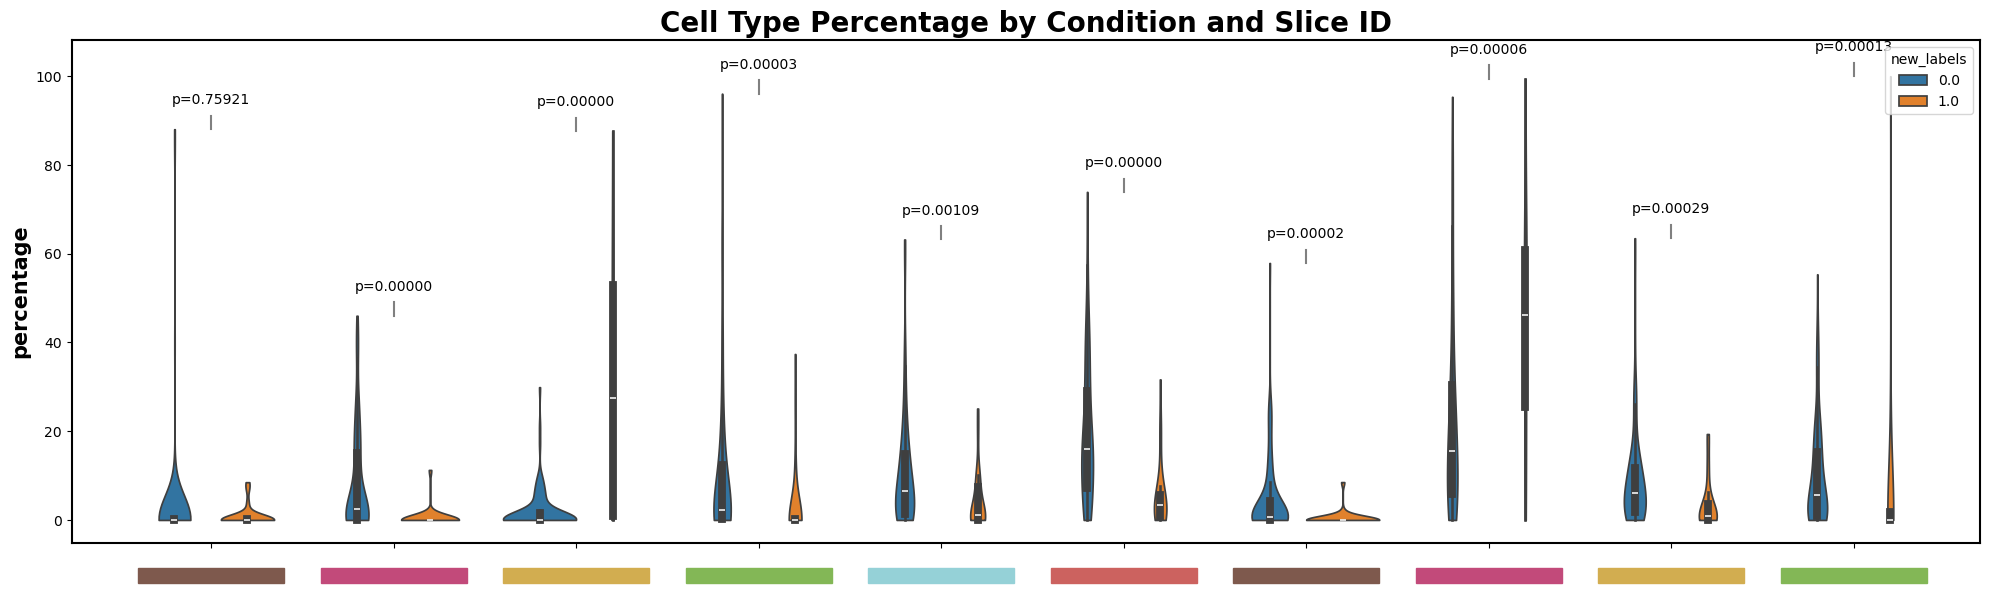

      new_labels slice_id           neighborhood name  counts  total_counts
0              0        0                                   0             0
1              0        0                  Bulk tumor       0             0
2              0        0                    Follicle       0             0
3              0        0        Granulocyte enriched       0             0
4              0        0   Immune-infiltrated stroma       0             0
...          ...      ...                         ...     ...           ...
1935           1       96         Macrophage enriched       0             0
1936           1       96               Smooth muscle       0             0
1937           1       96             T cell enriched       0             0
1938           1       96              Tumor boundary       0             0
1939           1       96  Vascularized smooth muscle       0             0

[1940 rows x 5 columns]
 P-value: 0.73609
Bulk tumor P-value: 0.00000
Follicle P-value:

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

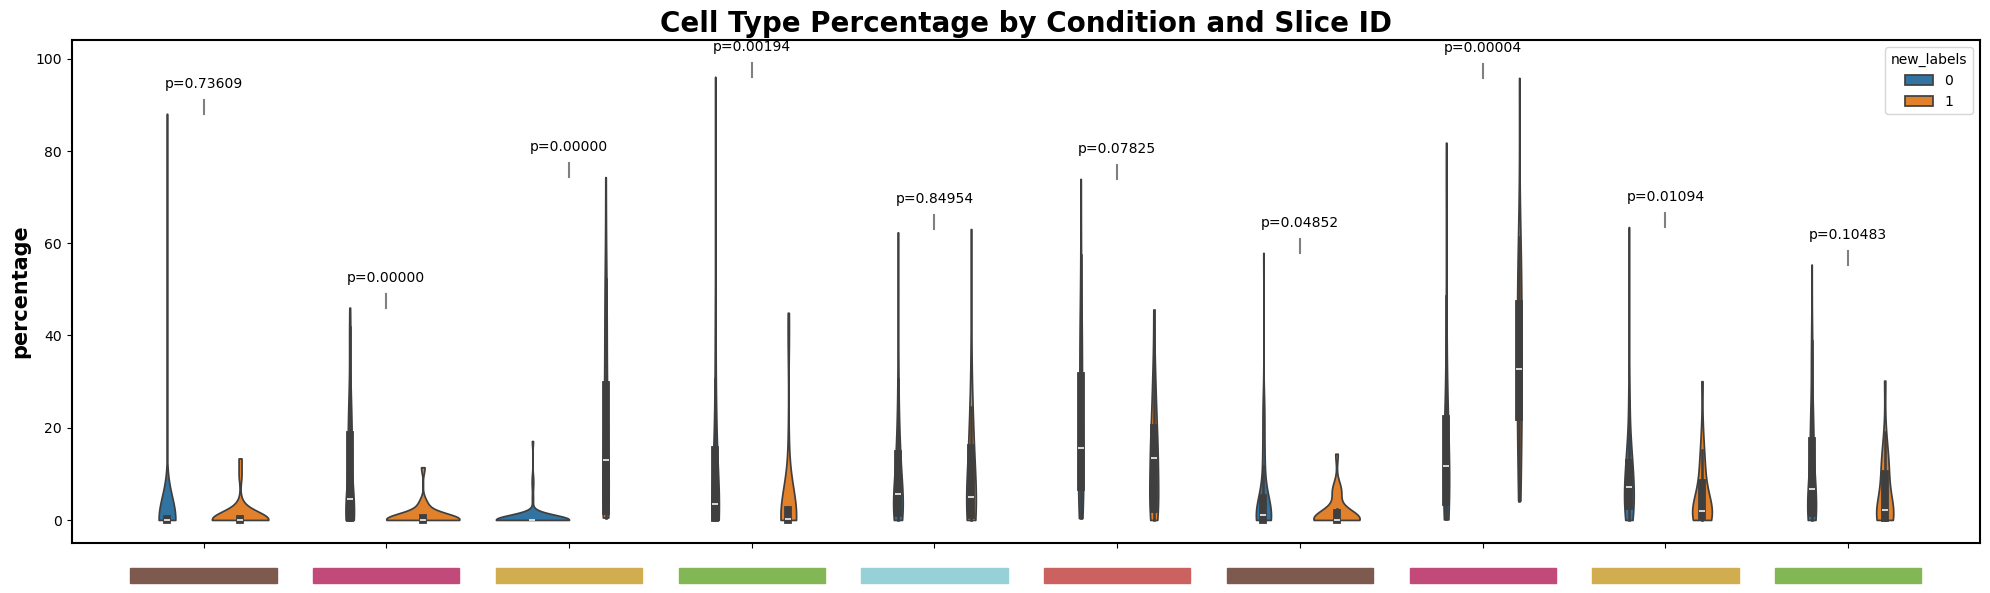

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu

from squidpy.pl._color_utils import Palette_t, _get_palette, _maybe_set_colors

import matplotlib.patches as patches


def plot_violin_plot(train_adata, ct_obs, batch_obs):
    
    p_values = []
    result = []
    label = ct_obs
    df = train_adata.obs


    total_counts = df.groupby(['new_labels', batch_obs]).size().reset_index(name='total_counts')


    counts = df.groupby(['new_labels', batch_obs, label]).size().reset_index(name='counts')


    counts = pd.merge(counts, total_counts, on=['new_labels', batch_obs])

    counts['percentage'] = (counts['counts'] / counts['total_counts']) * 100

    plt.figure(figsize=(20, 6))
    ax = sns.violinplot(x=label, y='percentage', hue='new_labels', data=counts, cut=0)
    plt.title('Cell Type Percentage by Condition and Slice ID')
    
    cell_types = counts[label].unique()
    for cell_type in cell_types:
        group_a = counts[(counts[label] == cell_type) & (counts['new_labels'] == 0)]['percentage']
        group_b = counts[(counts[label] == cell_type) & (counts['new_labels'] == 1)]['percentage']
        u_stat, p_value = mannwhitneyu(group_a, group_b, alternative='two-sided', nan_policy='omit')
        print(f'{cell_type} P-value: {p_value:.5f}')
        if (p_value < 0.05) & (group_a.mean()  > group_b.mean()):
            result.append(cell_type)
            
    color = train_adata.uns[ct_obs +'_colors']

    xticks = ax.get_xticks()

    folds = []
    cell_types = counts[label].unique()
    for i, cell_type in enumerate(cell_types):
        group_a = counts[(counts[label] == cell_type) & (counts['new_labels'] == 0)]['percentage']
        group_b = counts[(counts[label] == cell_type) & (counts['new_labels'] == 1)]['percentage']
        fold= np.log(np.mean(group_a[~np.isnan(group_a.values)])  / np.mean(group_b[~np.isnan(group_b.values)])+1)
        folds.append(fold)
        u_stat, p_value = mannwhitneyu(group_a, group_b, alternative='two-sided', nan_policy='omit')
        p_values.append(p_value)

        x_position = i
        y_position = max(group_a.max(), group_b.max()) + 5  
        plt.text(x_position, y_position, f'p={p_value:.5f}', ha='center', va='bottom')
        

        plt.plot([x_position, x_position], [y_position - 2, y_position - 5], color='grey') 

    plt.xlabel('')    

    for xtick, column in zip(xticks, color):
        ax.add_patch(patches.Rectangle((xtick - 0.4, -0.05), 0.8, -0.03, color=column, clip_on=False, transform=ax.get_xaxis_transform()))


    ax.set_xticklabels([])
    
    
    plt.xlabel('')

    plt.tight_layout()
    plt.show()
    return result, folds, p_values
cluster_key = 'neighborhood name'
batch_obs = 'slice_id'

adata_list = []

adata_plot = res

for s in adata_plot[adata_plot.obs['condition'] == 1].obs['slice_id'].unique():
    adata = adata_plot[adata_plot.obs['slice_id'] == s]
    if (adata.obs['new_labels'].unique().shape[0] > 1) & ('Follicle' in adata.obs[cluster_key].unique()):
        adata_list.append(adata)

adata_ = ad.concat(adata_list, label='slice_id')

for s in adata_plot[adata_plot.obs['condition'] == 0].obs['slice_id'].unique():
    adata = adata_plot[adata_plot.obs['slice_id'] == s]
    #if ('Follicle' in adata.obs[cluster_key].unique()) == False:
    adata_list.append(adata)


adata_full = ad.concat(adata_list, label='slice_id')

batch_obs = 'slice_id'

_maybe_set_colors(source=adata_plot, target=adata_, key=cluster_key)
_maybe_set_colors(source=adata_plot, target=adata_full, key=cluster_key)

_, folds_a, p_a = plot_violin_plot(adata_full, cluster_key, batch_obs)
adata_full.obs['new_labels'] = adata_full.obs['condition'].values
_, folds_b, p_b = plot_violin_plot(adata_full, cluster_key, batch_obs)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

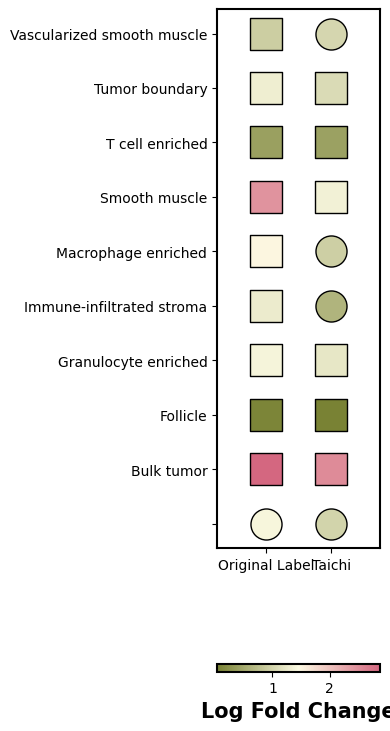

In [12]:
import pandas as pd

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15

name = adata_plot.obs['neighborhood name'].cat.categories.tolist()
p_values = p_a + p_b 
fold = folds_a + folds_b  
groups = ['0'] * len(p_a) +  ['1'] * len(p_b)


import matplotlib.pyplot as plt
import numpy as np
from palettable.cartocolors.diverging import ArmyRose_3

# Example data
variable_names = name
p_values_group1 = p_a
p_values_group2 = p_b
log_fold_changes_group1 = folds_a
log_fold_changes_group2 = folds_b
# Create the plot
fig, ax = plt.subplots(figsize=(4, 8))  # Adjusted figure size for better layout

# Adjust y positions to center dots and create space
x_positions_group_a = 0.3  # X position for Group A
x_positions_group_b = 0.7  # X position for Group B

# Calculate dot sizes from log fold changes, ensuring a minimum size
cmap =  ArmyRose_3.mpl_colormap

# Normalize log fold change values for coloring
norm = plt.Normalize(min(log_fold_changes_group1 + log_fold_changes_group2), max(log_fold_changes_group1 + log_fold_changes_group2))

# Plotting
for i, var in enumerate(variable_names):
    # Determine color based on log fold change
    color_group1 = cmap(norm(log_fold_changes_group1[i]))
    color_group2 = cmap(norm(log_fold_changes_group2[i]))
    
    # Determine shape based on p-value
    marker_group1 = 's' if p_values_group1[i] < 0.05 else 'o'  # Square for significant, circle for non-significant
    marker_group2 = 's' if p_values_group2[i] < 0.05 else 'o'
    
    ax.scatter(x_positions_group_a, i, color=color_group1, edgecolor='black', s=500, marker=marker_group1)
    ax.scatter(x_positions_group_b, i, color=color_group2, edgecolor='black', s=500, marker=marker_group2)

# Formatting
ax.set_xlim(0, 1)
ax.set_xticks([x_positions_group_a, x_positions_group_b])
ax.set_xticklabels(['Original Label', 'Taichi'])
ax.set_yticks(range(len(variable_names)))
ax.set_yticklabels(variable_names)


# Adding colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, orientation='horizontal', label='Log Fold Change')
plt.tight_layout()
plt.show()